In [1]:
import numpy as np
import utils
import os
from tspheuristics import NearestNeigbour, GenAlgo, LinProg
import time

In [2]:
# Probar con todas las intancias.
for filename in os.listdir('instances/'):
    cities = utils.read_instance(filename)
    tsp_inst = utils.dist_mat(cities)
    nn = NearestNeigbour(tsp_inst)
    gen = GenAlgo(tsp_inst, pop_size=len(cities)*2)
    lp = LinProg(tsp_inst)

    # Resolver
    if len(cities) < 60:
        start = time.time()
        lp.solve(verbose=False)
        end = time.time()
        print(f"Solución a instancia {filename} con programación lineal: {lp.cost}; {end-start} segundos")
    else:
        print(f"Solución a instancia {filename} con programación lineal: -; - segundos")

    start = time.time_ns()
    nn.solve(start=0, verbose=False)
    end = time.time_ns()
    print(f"Solución a instancia {filename} con NN: {nn.cost}; {end-start} nanosegundos")
    
    start = time.time()
    gen.solve(verbose=False)
    end = time.time()
    print(f"Solución a instancia {filename} con GenAlgo: {gen.cost}; {end-start} segundos")
    

Solución a instancia Inst29.txt con programación lineal: 9074.14804787284; 22.174843549728394 segundos
Solución a instancia Inst29.txt con NN: 10211.18472743141; 0 nanosegundos
Solución a instancia Inst29.txt con GenAlgo: 11638.29359524235; 5.806140899658203 segundos
Solución a instancia Inst51.txt con programación lineal: 428.8717563920339; 328.74160957336426 segundos
Solución a instancia Inst51.txt con NN: 513.610006884723; 14039400 nanosegundos
Solución a instancia Inst51.txt con GenAlgo: 518.3085943568454; 20.376013040542603 segundos
Solución a instancia Inst52.txt con programación lineal: 7544.365901904089; 209.75961709022522 segundos
Solución a instancia Inst52.txt con NN: 8980.918279329191; 0 nanosegundos
Solución a instancia Inst52.txt con GenAlgo: 10067.783056559927; 22.246949911117554 segundos
Solución a instancia Inst70.txt con programación lineal: -; - segundos
Solución a instancia Inst70.txt con NN: 805.5312008437772; 0 nanosegundos
Solución a instancia Inst70.txt con GenA

## Ejemplo de uso

In [3]:
cities = utils.read_instance('Inst29.txt')
tsp_inst = utils.dist_mat(cities)

In [4]:
mip1 = LinProg(tsp_inst)
nn1 = NearestNeigbour(tsp_inst)
gen1 = GenAlgo(tsp_inst)

In [5]:
mip1.solve()

Solución encontrada con costo: 9074.14804787284


In [6]:
nn1.solve(start=0)

Solución encontrada con costo: 10211.18472743141


In [12]:
gen1.solve(verbose=False)
gen1.cost

10023.374247714402

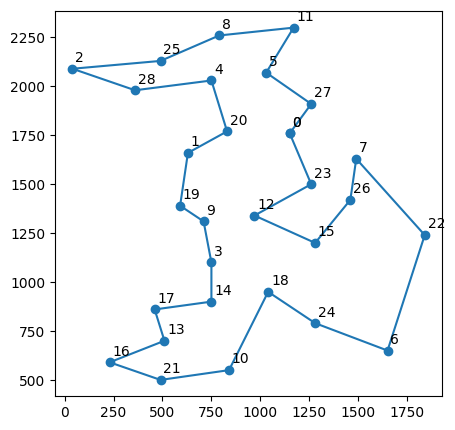

In [8]:
utils.plot_sol(cities, mip1.res)

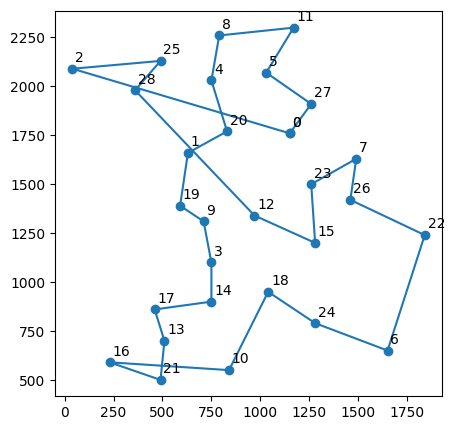

In [9]:
utils.plot_sol(cities,nn1.res)

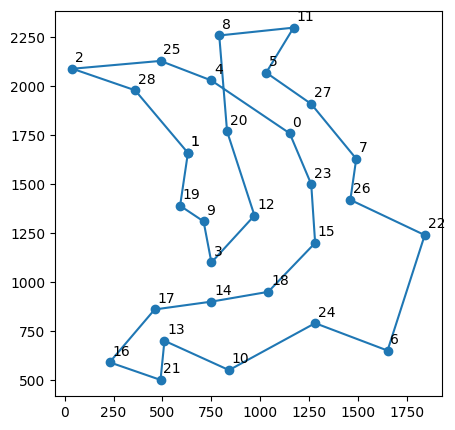

In [13]:
utils.plot_sol(cities,gen1.res)